In [72]:
#from pyserini.index.lucene import IndexReader
from matplotlib import pyplot as plt
import numpy as np
import json
import h5py
import pandas as pd

# BM25 index distribution

In [2]:
index_reader = IndexReader('lucene-index-msmarco/')

In [3]:
index_reader.stats()

{'total_terms': 352316036,
 'documents': 8841823,
 'non_empty_documents': 8841823,
 'unique_terms': -1}

In [21]:
# df: document frequency 
# cf: collection frequency
import itertools
for term in itertools.islice(index_reader.terms(), 10):
    print(f'{term.term} (df={term.df}, cf={term.cf})')
    #print(f'{term.term}')

0 (df=73630, cf=103199)
0'2.56n (df=2, cf=2)
0'26 (df=1, cf=1)
0,0 (df=122, cf=163)
0,0,0 (df=31, cf=32)
0,0,0,0 (df=4, cf=4)
0,0,0,0,0,0,0,8,7,0,7,5,8,8,8,6,7,2 (df=3, cf=4)
0,0,0,0.26 (df=1, cf=1)
0,0,0,0.5 (df=1, cf=1)
0,0,0,1 (df=1, cf=1)
0,0,1 (df=4, cf=5)
0,0,128 (df=2, cf=2)
0,0,255 (df=4, cf=4)
0,0,48 (df=1, cf=4)
0,0,90 (df=1, cf=1)
0,0.35 (df=1, cf=1)
0,0.5 (df=1, cf=1)
0,0.7 (df=1, cf=3)
0,00 (df=3, cf=3)
0,00,1,2,3 (df=2, cf=2)
0,00.00 (df=1, cf=1)
0,000 (df=31, cf=34)
0,000,000 (df=6, cf=6)
0,000.00 (df=2, cf=2)
0,0000 (df=1, cf=2)
0,00003 (df=3, cf=4)
0,000039 (df=2, cf=2)
0,0001 (df=1, cf=2)
0,000625055 (df=1, cf=1)
0,001 (df=5, cf=10)
0,0011 (df=1, cf=2)
0,0025mm (df=1, cf=1)
0,003 (df=1, cf=1)
0,004 (df=1, cf=2)
0,005mm (df=1, cf=1)
0,009 (df=1, cf=1)
0,01 (df=5, cf=5)
0,010,931 (df=1, cf=1)
0,012 (df=1, cf=1)
0,017 (df=1, cf=2)
0,01772 (df=1, cf=1)
0,018 (df=1, cf=1)
0,01m (df=1, cf=1)
0,02 (df=11, cf=13)
0,021 (df=1, cf=1)
0,022 (df=1, cf=1)
0,0225 (df=3, cf=4)
0,028

0.3914 (df=1, cf=1)
0.3915 (df=2, cf=2)
0.391914 (df=1, cf=1)
0.392 (df=2, cf=2)
0.393 (df=2, cf=3)
0.3933 (df=4, cf=5)
0.3934 (df=1, cf=1)
0.3937 (df=31, cf=45)
0.39370 (df=10, cf=11)
0.393700787 (df=19, cf=25)
0.3937007874 (df=10, cf=11)
0.393700787401 (df=5, cf=5)
0.39370078740157 (df=3, cf=4)
0.393700787402 (df=4, cf=4)
0.3937007874â (df=6, cf=8)
0.39370079 (df=3, cf=3)
0.3937008 (df=3, cf=3)
0.393701 (df=6, cf=10)
0.394 (df=17, cf=18)
0.395 (df=7, cf=9)
0.3950 (df=1, cf=1)
0.3954 (df=2, cf=2)
0.396 (df=3, cf=3)
0.3962 (df=1, cf=1)
0.3964 (df=1, cf=1)
0.3965 (df=2, cf=3)
0.39655 (df=1, cf=1)
0.3969 (df=3, cf=3)
0.396g (df=1, cf=1)
0.397 (df=2, cf=2)
0.398 (df=5, cf=6)
0.3986 (df=1, cf=1)
0.3987 (df=1, cf=1)
0.399 (df=2, cf=3)
0.3995 (df=2, cf=2)
0.3999 (df=1, cf=1)
0.399total (df=1, cf=1)
0.39g (df=1, cf=1)
0.39p (df=2, cf=2)
0.39â (df=25, cf=28)
0.3c (df=9, cf=10)
0.3cc (df=2, cf=2)
0.3cm (df=1, cf=1)
0.3cpl (df=1, cf=1)
0.3g (df=51, cf=57)
0.3ghz (df=2, cf=2)
0.3gram (df=1, cf=1)

* Document frequency: The total number of documents which contain the term in the corpus
* Collection frequency: The total number of occurences of the term in the entire corpus

In [25]:
term_len = []
for term in itertools.islice(index_reader.terms(),352316036):
    term_len.append(term.df)
    #print(f'{term.term} (df={term.df}, cf={term.cf})')
    #print(f'{term.term}')
len(term_len)

2660824

In [32]:
term_len.sort(reverse=True)

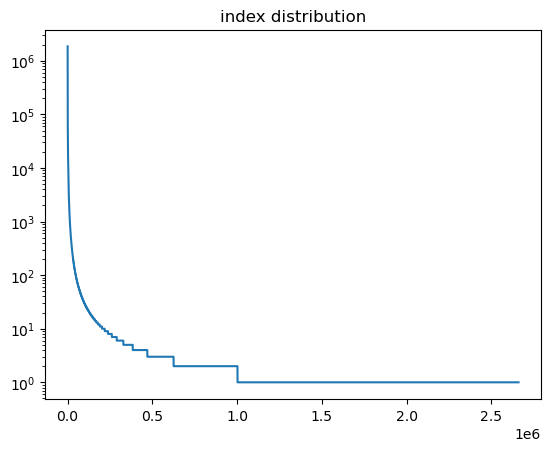

In [39]:
plt.plot(range(2660824),term_len)
plt.title('index distribution')
plt.yscale('log')

In [1]:
# # write the list into file
# with open("test.json","w") as fp:
#     json.dump(term_len, fp)

In [7]:
# load the list into file
with open("models/BM25_index_dist.json","r") as fp:
    BM25_id = json.load(fp)

# Splade index distribution

### Cocondenser ensemble distill monoGPU

In [8]:
with open('models/splade_cd_index_dist.json') as json_file:
    data = json.load(json_file)
 
    # Print the key with the max value
    print(max(data, key= data.get), data[max(data, key= data.get)])


2748 1804955


In [9]:
splade_cd_id = list(data.values())
len(splade_cd_id)

28679

In [10]:
splade_cd_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

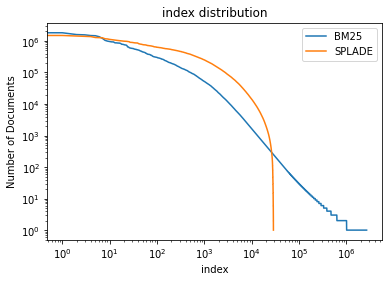

In [12]:
plt.plot(range(len(BM25_id)),BM25_id)
plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.title('index distribution')
plt.legend(['BM25', 'SPLADE'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('index')
plt.ylabel('Number of Documents')

### Splade Efficient 2 index distribution

In [13]:
filename = "models/efficient2/VI/BT/large/index/array_index.h5py"

In [14]:
def read_hdf5(path):

    weights = {}

    keys = []
    with h5py.File(path, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        #print(keys)
        for key in keys:
            #print(f[key].name)
            weights[f[key].name] = f[key][()]
            
    return weights

In [15]:
splade_e2 =  read_hdf5(filename)

In [17]:
# Record the length of the documents in each index
i=0
splade_e2_id = []
for key in splade_e2.keys():
    if '/index_doc_id_' in key:
        i+=1
        splade_e2_id.append(len(splade_e2[key]))

In [18]:
len(splade_e2_id)

28698

In [19]:
splade_e2_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

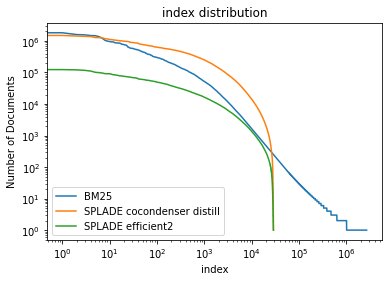

In [20]:
plt.plot(range(len(BM25_id)),BM25_id)
plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.title('index distribution')
plt.legend(['BM25', 'SPLADE cocondenser distill', 'SPLADE efficient2'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('index')
plt.ylabel('Number of Documents')

### cocondenser_1_0.9

In [21]:
# Opening JSON file
with open('models/cocondenser_1_0.9/index/index_dist.json') as json_file:
    data = json.load(json_file)

splace_c_1_09 = list(data.values())

splace_c_1_09.sort(reverse=True)


### cocondenser_ensemble_distil_monogpu

In [22]:
#cocondenser_ensemble_distil_monogpu
# Opening JSON file
with open('models/cocondenser_ensemble_distil_monogpu/index/index_dist.json') as json_file:
    data = json.load(json_file)

splace_cedm_id = list(data.values())

splace_cedm_id.sort(reverse=True)

### efficient model

In [23]:
with open('models/efficient/VI/BT/large/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e1_id = list(data.values())

splade_e1_id.sort(reverse=True)

### efficient 3 model

In [24]:
#cocondenser_ensemble_distil_monogpu_10_10_2
with open('models/efficient3/V/small/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_id = list(data.values())

splade_e3_id.sort(reverse=True)

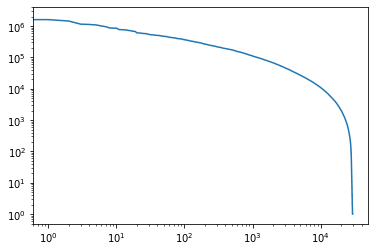

In [25]:
plt.plot(range(len(splade_e3_id)),splade_e3_id)

plt.yscale('log')
plt.xscale('log')

Text(0, 0.5, 'Number of Documents')

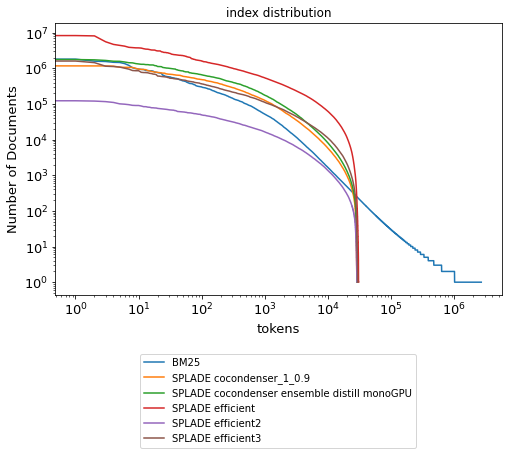

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
plt.title('index distribution')
plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            'SPLADE efficient',
            'SPLADE efficient2',
            'SPLADE efficient3'],
           loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

# BERT index

In [27]:
with open('models/BERT_index_lengths.json') as json_file:
    BERT_index = json.load(json_file)

In [28]:
BERT_id = list(BERT_index.values())

In [29]:
BERT_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

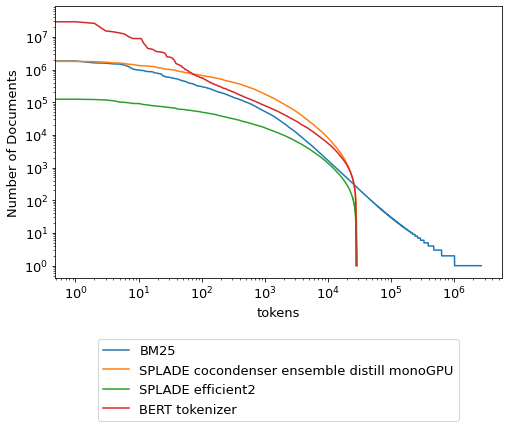

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
#plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),BERT_id)

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            #'SPLADE efficient3'
            'BERT tokenizer'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

# ColBERT distribution

In [31]:
# # write the list into file
# with open("ColBERT_dist.json","w") as fp:
#     json.dump(ColBERT_dist, fp)

In [32]:
with open("models/ColBERT_dist.json","r") as fp:
    ColBERT_dist = json.load(fp)

Text(0, 0.5, 'Number of Documents')

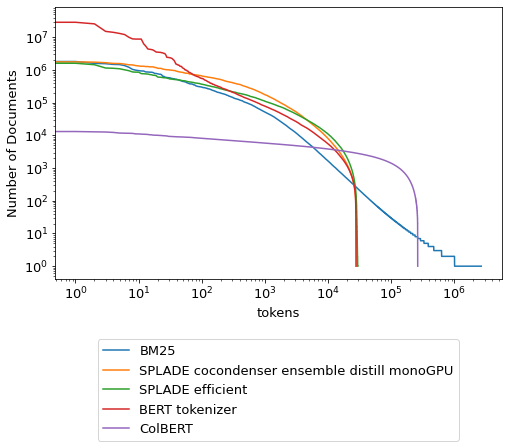

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
#plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),BERT_id)
plt.plot(range(len(ColBERT_dist)), ColBERT_dist)

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            #'SPLADE efficient2',
            'SPLADE efficient',
            'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Acc Number of Documents')

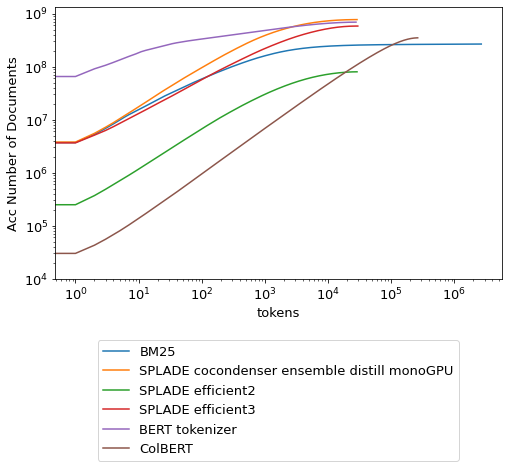

In [67]:
## cumulative sum of the doc listings

plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),np.cumsum(BM25_id))
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),np.cumsum(splace_cedm_id))

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),np.cumsum(splade_e2_id))
plt.plot(range(len(splade_e3_id)),np.cumsum(splade_e3_id))
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),np.cumsum(BERT_id))
plt.plot(range(len(ColBERT_dist)), np.cumsum(ColBERT_dist))

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            'SPLADE efficient3',
            'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Acc Number of Documents', fontsize = 13)

In [69]:
print(np.cumsum(BM25_id)[-1])
print(np.cumsum(splace_cedm_id)[-1])
print(np.cumsum(splade_e3_id)[-1])

266247718
769867622
581626340


Text(0, 0.5, 'Number of Documents')

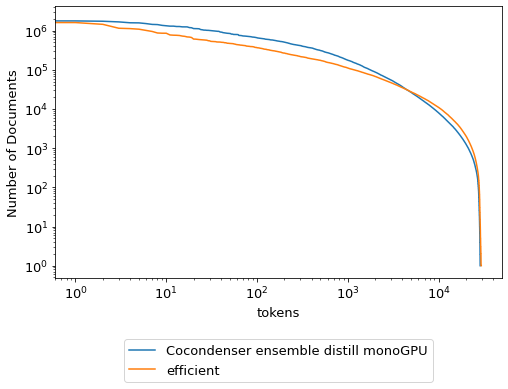

In [35]:
plt.figure(figsize=(8, 5))
#plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
#plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
#plt.plot(range(len(BERT_id)),BERT_id)
#plt.plot(range(len(ColBERT_dist)), ColBERT_dist)

plt.legend([#'BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'Cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            #'SPLADE efficient2',
            'efficient',
            #'BERT tokenizer',
            #'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Number of Documents')

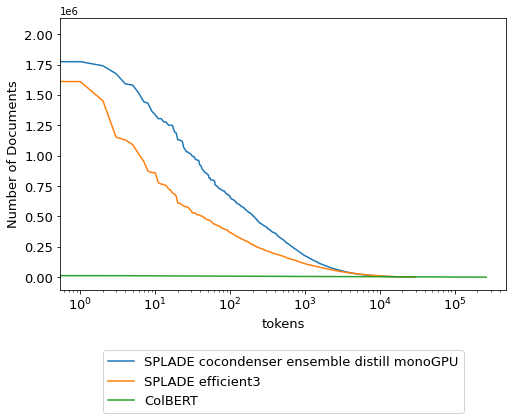

In [38]:
plt.figure(figsize=(8, 5))
#plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
#plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
#plt.plot(range(len(BERT_id)),BERT_id)
plt.plot(range(len(ColBERT_dist)), ColBERT_dist)

plt.legend([#'BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            #'SPLADE efficient2',
            'SPLADE efficient3',
            #'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Number of Documents')

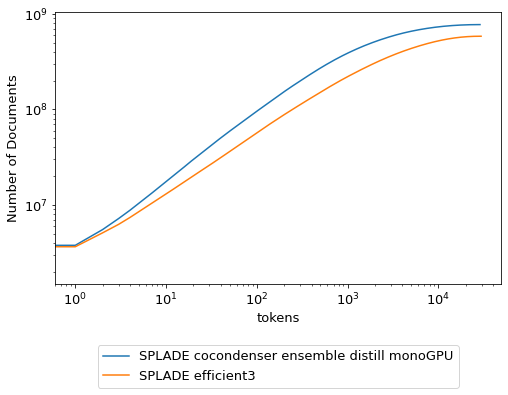

In [39]:
plt.figure(figsize=(8, 5))
#plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),np.cumsum(splace_cedm_id))

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
#plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),np.cumsum(splade_e3_id))
#plt.title('index distribution')
#plt.plot(range(len(BERT_id)),BERT_id)
#plt.plot(range(len(ColBERT_dist)), np.cumsum(ColBERT_dist))

plt.legend([#'BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            #'SPLADE efficient2',
            'SPLADE efficient3'
            #'BERT tokenizer',
            #'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

# Hyperparameter tuning  

## Regularization parameter $\lambda$

#### Ld 5e-2

In [47]:
with open('models/efficient/V/small_Ld_5e2/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Ld5e2 = list(data.values())

splade_e3_Ld5e2.sort(reverse=True)

#### Ld 5e-1

In [48]:
with open('models/efficient/V/small_5e1_1101/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Ld5e1 = list(data.values())

splade_e3_Ld5e1.sort(reverse=True)

#### Lq 5e-2

In [49]:
with open('models/efficient/V/small_lq2_5e2_1111/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Lq5e2 = list(data.values())

splade_e3_Lq5e2.sort(reverse=True)

#### Lq 5e-1

In [50]:
## L_q 5e-1
with open('models/efficient/V/small_lq_5e1_1112/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Lq5e1 = list(data.values())

splade_e3_Lq5e1.sort(reverse=True)

#### Ld 5e-2, Lq 5e-2

In [51]:

with open('models/efficient/V/small_lq_5e2_1113/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_LdLq5e2 = list(data.values())

splade_e3_LdLq5e2.sort(reverse=True)

#### Lq 5.5e-3

In [52]:

with open('models/efficient/V/small_ldq_55e3_1114/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Lq55e3 = list(data.values())

splade_e3_Lq55e3.sort(reverse=True)

## Loss function
#### IB Loss

In [53]:
with open('models/efficient/V/small_IBLOSS/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_IBLoss = list(data.values())

splade_IBLoss.sort(reverse=True)

#### BCE Loss

In [54]:
with open('models/efficient/V/small_BCE/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_BCE = list(data.values())

splade_BCE.sort(reverse=True)

#### BCE2 Loss

In [55]:
with open('models/efficient/V/small_BCE2/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_BCE2 = list(data.values())

splade_BCE2.sort(reverse=True)

#### PNL

In [56]:
with open('models/efficient/V/small_PNL/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_PNL = list(data.values())

splade_PNL.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

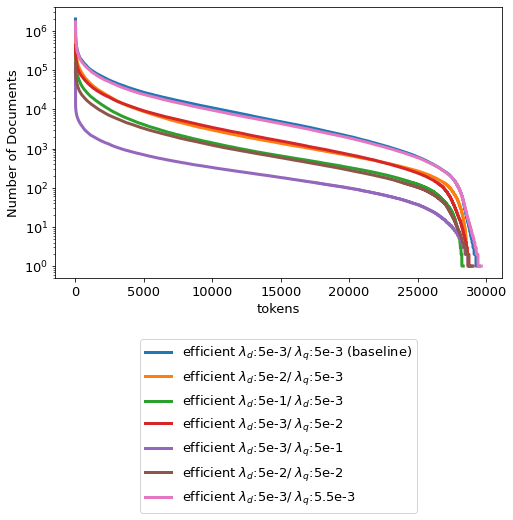

In [57]:
plt.figure(figsize=(8, 5))

plt.plot(range(len(splade_e3_id)),splade_e3_id, linewidth=3)
plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2, linewidth=3)
plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1, linewidth=3)
plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2, linewidth=3)
plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1, linewidth=3)
plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2, linewidth=3)
plt.plot(range(len(splade_e3_Lq55e3)),splade_e3_Lq55e3, linewidth=3)

plt.legend(['efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


Text(0, 0.5, 'Number of Documents')

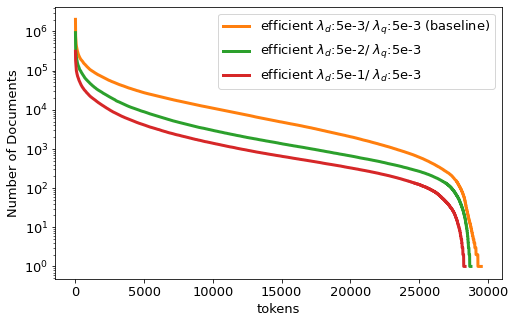

In [58]:
## Lambda_d variation

plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.plot(range(len(splade_e3_id)),splade_e3_id, color = colors[1], linewidth=3)
plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2, color = colors[2], linewidth=3)
plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1, color = colors[3], linewidth=3)
#plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2)
#plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1)
#plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2)

plt.legend(['efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3'
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2'
           ],
           loc='upper right', fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


Text(0, 0.5, 'Number of Documents')

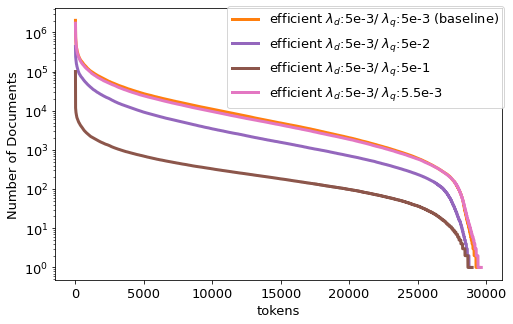

In [59]:
## Lambda_q variation

plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.plot(range(len(splade_e3_id)),splade_e3_id, color = colors[1], linewidth=3)
#plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2)
#plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1)
plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2, color = colors[4], linewidth=3)
plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1, color = colors[5], linewidth=3)
#plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2)
plt.plot(range(len(splade_e3_Lq55e3)),splade_e3_Lq55e3, color = colors[6], linewidth=3)

plt.legend(['efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            #'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'#,
           ],
           loc='upper right', fontsize = 13, bbox_to_anchor=(1.02, 1.03))
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


(100.0, 100000.0)

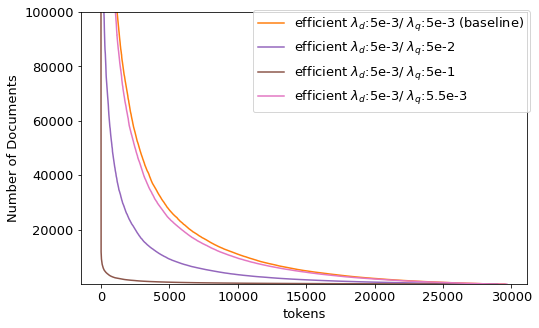

In [60]:
plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.plot(range(len(splade_e3_id)),splade_e3_id, color = colors[1])
#plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2)
#plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1)
plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2, color = colors[4])
plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1, color = colors[5])
#plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2)
plt.plot(range(len(splade_e3_Lq55e3)),splade_e3_Lq55e3, color = colors[6])

plt.legend(['efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            #'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'#,
           ],
           loc='upper right', fontsize = 13, bbox_to_anchor=(1.02, 1.03))
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)
plt.ylim([100, 100000])


Text(0, 0.5, 'Number of Documents')

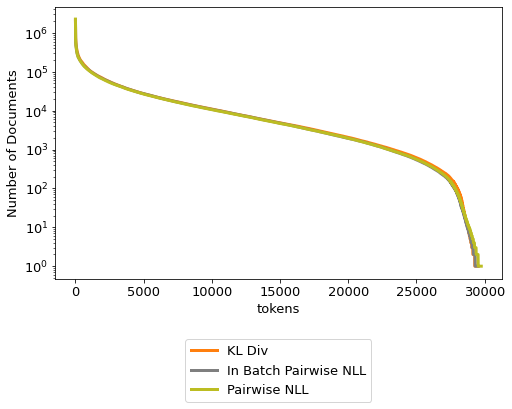

In [61]:
plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.plot(range(len(splade_e3_id)),splade_e3_id, linewidth=3, color = colors[1])
#plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1, linewidth=3)
#plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1, linewidth=3)
#plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Lq55e3)),splade_e3_Lq55e3, linewidth=3)
plt.plot(range(len(splade_IBLoss)),splade_IBLoss, linewidth=3, color = colors[7])
#plt.plot(range(len(splade_BCE)),splade_BCE, linewidth=3)
plt.plot(range(len(splade_PNL)),splade_PNL, linewidth=3, color = colors[8])
#plt.plot(range(len(splade_BCE2)),splade_BCE2, linewidth=3)

plt.legend([#'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            #'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'
            'KL Div',
            'In Batch Pairwise NLL',
            #'BCE with Logits Loss',
            'Pairwise NLL',
            #'BCE2'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


Text(0, 0.5, 'Number of Documents')

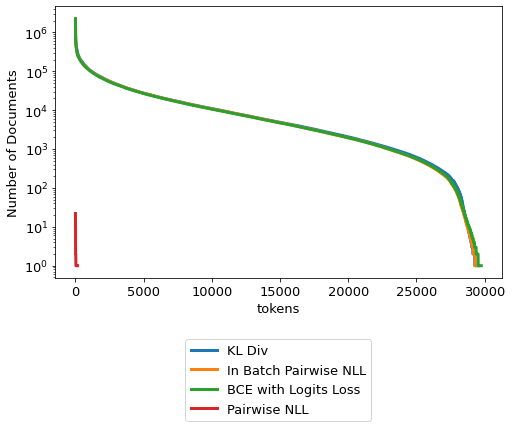

In [62]:
plt.figure(figsize=(8, 5))

plt.plot(range(len(splade_e3_id)),splade_e3_id, linewidth=3)
#plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Ld5e1)),splade_e3_Ld5e1, linewidth=3)
#plt.plot(range(len(splade_e3_Lq5e2)),splade_e3_Lq5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Lq5e1)),splade_e3_Lq5e1, linewidth=3)
#plt.plot(range(len(splade_e3_LdLq5e2)),splade_e3_LdLq5e2, linewidth=3)
#plt.plot(range(len(splade_e3_Lq55e3)),splade_e3_Lq55e3, linewidth=3)
plt.plot(range(len(splade_IBLoss)),splade_IBLoss, linewidth=3)
#plt.plot(range(len(splade_BCE)),splade_BCE, linewidth=3)
plt.plot(range(len(splade_PNL)),splade_PNL, linewidth=3)
plt.plot(range(len(splade_BCE2)),splade_BCE2, linewidth=3)

plt.legend([#'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            #'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'
            'KL Div',
            'In Batch Pairwise NLL',
            'BCE with Logits Loss',
            'Pairwise NLL',
            'BCE2'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


# MRR and FLOPs

Text(0, 0.5, 'MRR')

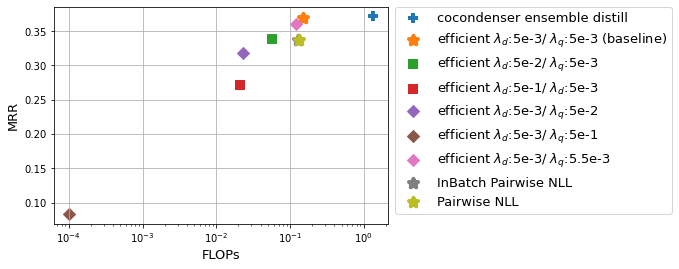

In [71]:

Flops = [1.34, 0.15, 0.057, 0.021, 0.023, 0.0001, 0.122, 0.1276, 0.1336]
MRR = [0.3710, 0.3682, 0.3376, 0.2716, 0.3180, 0.0831, 0.3606, 0.3368, 0.335973]

markers = ["P", "*", "s", "s","D","D","D","*","*"]
border = [0, 4, 0, 0, 0, 0, 0, 4, 4]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(len(Flops)):
    plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )

plt.xscale('log')
plt.legend(['cocondenser ensemble distill',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3' ,
            'InBatch Pairwise NLL',
            'Pairwise NLL'
           ],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 13)
plt.grid()
plt.xlabel('FLOPs', fontsize = 13)
plt.ylabel('MRR', fontsize = 13)

Text(0, 0.5, 'MRR')

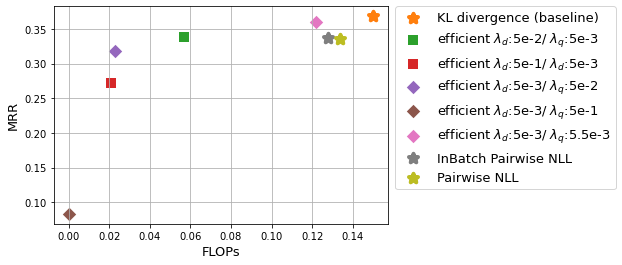

In [64]:

Flops = [0.15, 0.057, 0.021, 0.023, 0.0001, 0.122, 0.1276, 0.1336]
MRR = [ 0.3682, 0.3376, 0.2716, 0.3180, 0.0831, 0.3606, 0.3368, 0.335973]

# markers = ["P", "*", "s", "s","D","D","D","*","*"]
# border = [0, 4, 0, 0, 0, 0, 0, 4, 4]
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = [ "*", "s", "s","D","D","D","*","*"]
border = [ 4, 0, 0, 0, 0, 0, 4, 4]
colors = [ '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i in range(len(Flops)):
    plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )
# i=1
# plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )
# i=7
# plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )
# i=8
# plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )

#plt.xscale('log')
plt.legend([#'cocondenser ensemble distill',
            'KL divergence (baseline)',
            'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3' ,
            'InBatch Pairwise NLL',
            'Pairwise NLL'
           ],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 13)
plt.grid()
plt.xlabel('FLOPs', fontsize = 13)
plt.ylabel('MRR', fontsize = 13)

Text(0, 0.5, 'MRR')

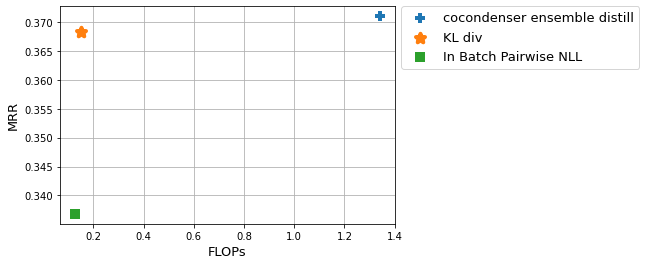

In [66]:

Flops = [1.34, 0.15, 0.1276]
MRR = [0.3710, 0.3682, 0.3368] 

markers = ["P", "*", "s" ]
border = [0, 4, 0, 0, 0, 0,0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(len(Flops)):
    plt.scatter(Flops[i],MRR[i], marker = markers[i], c=colors[i], s=90, linewidth=border[i] )

#plt.xscale('log')
plt.legend(['cocondenser ensemble distill',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-3 (baseline)',
            #'efficient $\lambda_d$:5e-2/ $\lambda_q$:5e-3',
            #'efficient $\lambda_d$:5e-1/ $\lambda_d$:5e-3',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-2',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5e-1',
            #'efficient $\lambda_d$:5e-3/ $\lambda_q$:5.5e-3'
            'KL div',
            'In Batch Pairwise NLL'
            
           ],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 13)
plt.grid()
plt.xlabel('FLOPs', fontsize = 13)
plt.ylabel('MRR', fontsize = 13)

# For Tableau figure of index distribution

In [89]:
# reference index
with open('models/efficient3/V/small/checkpoint/model/tokenizer.json') as json_file:
    reference = json.load(json_file)
    
key_list = list(reference['model']['vocab'].keys())    # token number
val_list = list(reference['model']['vocab'].values())  # corresponding word

def tableau_index_dist(filename):
    
    index_dist_df = pd.DataFrame(pd.read_json(filename, typ = 'series'))
    index_dist_df.columns = ['count']
    token = []
    for i in index_dist_df.index:
        token.append(key_list[val_list.index(i)])
    index_dist_df['token'] = token  
    index_dist_df = index_dist_df.sort_values(by=['count'], ascending=False)
    return index_dist_df.reset_index()

In [93]:
eff_bl = tableau_index_dist('models/efficient3/V/small/index/index_dist.json')
ccd_mdl = tableau_index_dist('models/cocondenser_ensemble_distil_monogpu/index/index_dist.json')

In [94]:
eff_bl.to_excel('tableau/eff_bl.xlsx')
ccd_mdl.to_excel('tableau/ccd_mdl.xlsx')

In [95]:
# Ld 5e-2
eff_Ld5e2 = tableau_index_dist('models/efficient/V/small_Ld_5e2/index/index_dist.json')
eff_Ld5e2.to_excel('tableau/eff_Ld5e2.xlsx')

#Ld 5e-1
eff_Ld5e1 = tableau_index_dist('models/efficient/V/small_5e1_1101/index/index_dist.json')
eff_Ld5e1.to_excel('tableau/eff_Ld5e1.xlsx')

#Lq 5e-2   
eff_Lq5e2 = tableau_index_dist('models/efficient/V/small_lq2_5e2_1111/index/index_dist.json')
eff_Lq5e2.to_excel('tableau/eff_Lq5e2.xlsx')

#Lq 5e-1
eff_Lq5e1 = tableau_index_dist('models/efficient/V/small_lq_5e1_1112/index/index_dist.json')
eff_Lq5e1.to_excel('tableau/eff_Lq5e1.xlsx')

#Lq 5.5e-3
eff_Lq55e3 = tableau_index_dist('models/efficient/V/small_ldq_55e3_1114/index/index_dist.json')
eff_Lq55e3.to_excel('tableau/eff_Lq55e3.xlsx')

#IB_Loss
eff_IBLOSS = tableau_index_dist('models/efficient/V/small_IBLOSS/index/index_dist.json')
eff_IBLOSS.to_excel('tableau/eff_IBLOSS.xlsx')

#PNL_Loss
eff_PNLLOSS = tableau_index_dist('models/efficient/V/small_PNL/index/index_dist.json')
eff_PNLLOSS.to_excel('tableau/eff_PNLLOSS.xlsx')